# The Effects of Borrower and Loan Attributes on Borrower's APR and Loan Outcomes
## by Yiming Zhao

## Investigation Overview

In this investigation, I mainly looked at attributes which may potentially impact Borrower's APR and potential loan outcomes. The main focus was on the loan interest rate, principal amount, loan term, borrower's Prosper score, stated monthly income, and income range.

## Dataset Overview

This dataset consists data of 113,937 loans with 81 variables, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. This explanatory analysis mainly focus on 10 variables.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loan = pd.read_csv('prosperLoanData.csv')

In [3]:
# convert variables into ordered categorical types
ordinal_var_dict = {'ProsperRating (Alpha)': ['AA', 'A', 'B', 'C', 'D', 'E', 'HR'],
                   'ProsperRating (numeric)': [1, 2, 3, 4, 5, 6, 7],
                   'ProsperScore': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                    'Term' : [12, 36, 60],
                   'IncomeRange': ['$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+'],
                   'LoanStatus': ['Completed', 'FinalPaymentInProgress', 'Current', 'Past Due (1-15 days)', 'Past Due (16-30 days)', 'Past Due (31-60 days)',
                                 'Past Due (61-90 days)', 'Past Due (91-120 days)', 'Past Due (>120 days)', 'Cancelled',
                                 'Chargedoff', 'Defaulted']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered=True,
                                               categories = ordinal_var_dict[var])
    loan[var] = loan[var].astype(ordered_var)

## Distribution of Borrower's APR

Borrowers APR ranges from almost 0 to 0.5. The distribution of APR takes on a bell shape, with a spike at around 0.35 to 0.36.

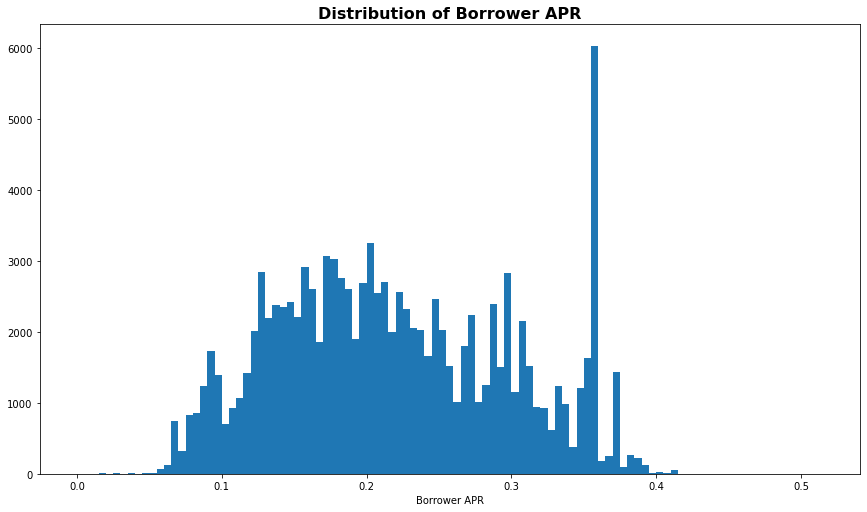

In [4]:
plt.figure(figsize=[14.70, 8.27])
binsize=0.005
bins = np.arange(0, loan.BorrowerAPR.max()+binsize, binsize)
plt.hist(data=loan, x='BorrowerAPR', bins=bins)
plt.xlabel('Borrower APR');
plt.title('Distribution of Borrower APR', fontsize=16, weight='bold');

## Distribution of Loan Principal Amount and Borrower's Monthly Income

We notice that most of the borrower's monthly income is within the range of $2500  to  $7500, with the distribution skewed to the right. Most of the principal amounts are between $5k - $10k, and the principal is normally distributed, plotted onn a logarithmic scale.

In [5]:
def log_trans(x, inverse=False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10,x)
loan['log_principal'] = loan['ProsperPrincipalBorrowed'].apply(lambda x:log_trans(x))

In [6]:
invalid_loan=loan['ProsperPrincipalBorrowed']==0
loan=loan.loc[-invalid_loan]

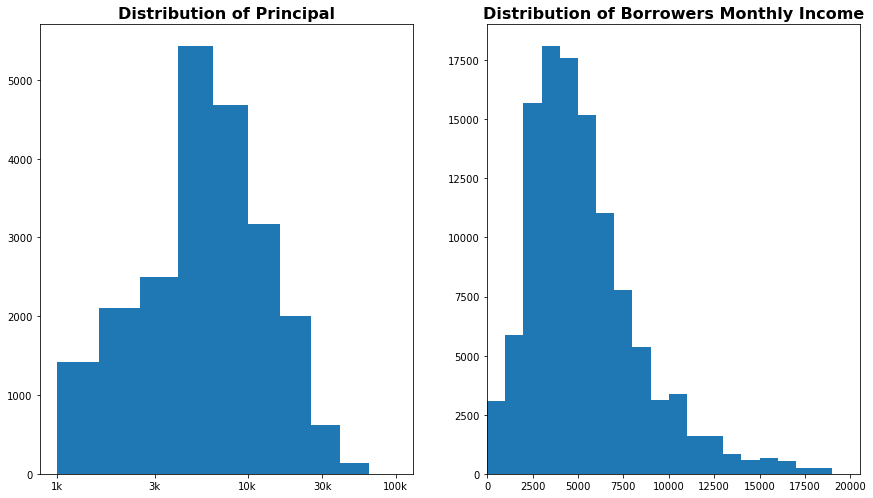

In [7]:
plt.figure(figsize=[14.70, 8.27])
plt.tight_layout();
#plot principla
plt.subplot(1,2,1)
bins = np.arange(3, loan.log_principal.max()+0.2, 0.2)
plt.hist(data=loan, x='log_principal', bins=bins)
plt.xscale('log')
ticks=np.array([1e3, 3e3, 1e4, 3e4, 1e5])
plt.xticks(log_trans(ticks), ['1k', '3k', '10k', '30k', '100k'])
plt.title('Distribution of Principal',fontsize=16, weight='bold');

#plot the 99% monthly income
plt.subplot(1,2,2)
bins=np.arange(0,20000,1000)
plt.hist(data=loan, x='StatedMonthlyIncome', bins=bins)
plt.xlim(0,loan.StatedMonthlyIncome.quantile(0.99));
plt.title('Distribution of Borrowers Monthly Income', fontsize=16, weight='bold');

## Attributes that Impact Borrower's APR

### Borrower's APR vs Interest Rate/Estimated Return/Borrower's Credit Score

It appears that borrower's APR, borrower's interest, estimated return, and borrower's credit score are highly correlated with each other. From a borrower's perspective, higher interest rate seems to increase the APR. And borrower with a high credit score will usually have a lower APR. From a lender perspective, higher APR will increase the estimated rate of return for the loan.


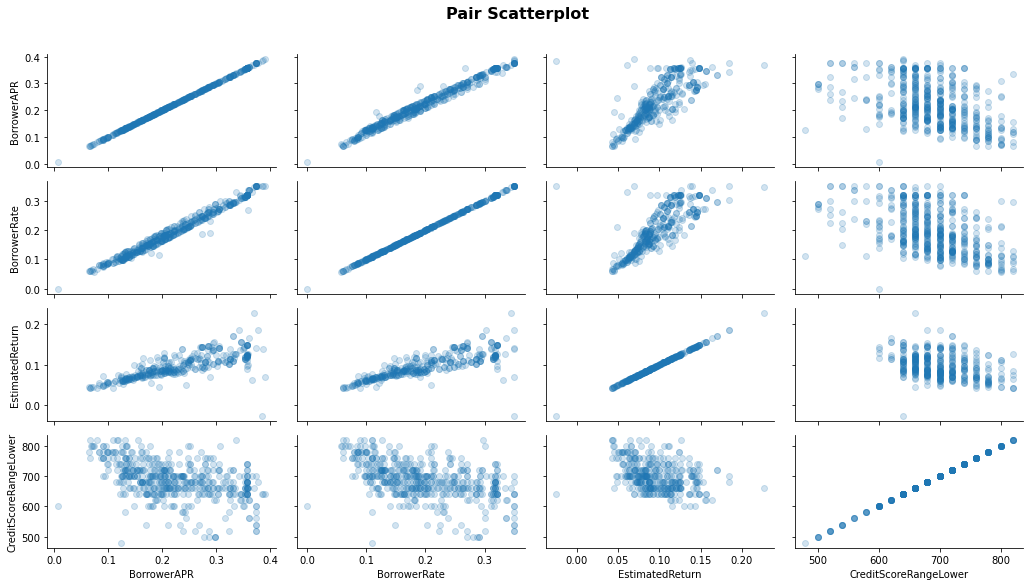

In [8]:
numeric_vars = ['BorrowerAPR', 'BorrowerRate', 'EstimatedReturn', 'CreditScoreRangeLower']
np.random.seed(2021)
sample = np.random.choice(loan.shape[0], 500, replace=False)
df_sub = loan.iloc[sample, :]

g=sb.PairGrid(data=df_sub, vars=numeric_vars, height = 8.27/4,  aspect = (14.70/4)/(8.27/4))
g.map(plt.scatter, alpha=0.2)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Pair Scatterplot', fontsize=16, weight='bold');

## Attributes that Impact Borrower's APR

### Borrower's APR vs Loan Principal

The scatterplot shows that as the principal amount increases, the borrower's APR descreases. The variables are negatively correlated with each other. 

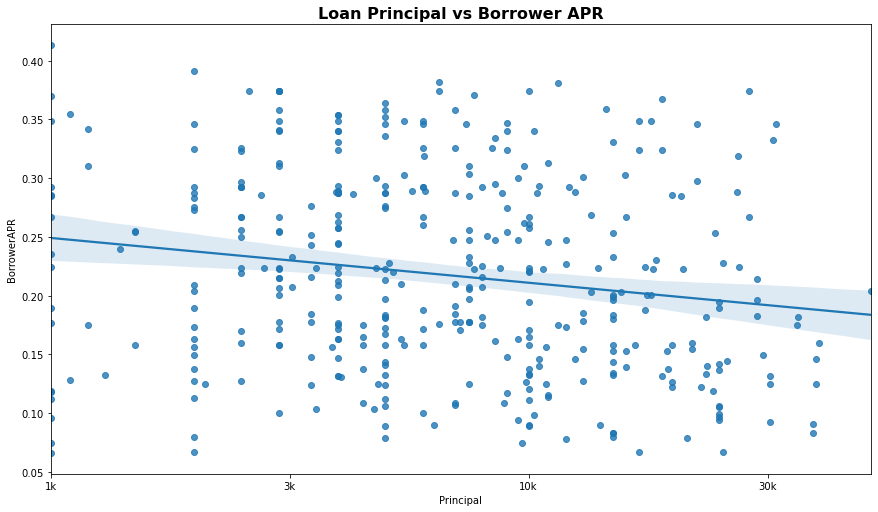

In [9]:
samples = np.random.choice(loan.shape[0], 2000, replace=False)
df_sample = loan.iloc[samples,:]

plt.figure(figsize=[14.70, 8.27])
sb.regplot(data=df_sample, x='log_principal', y='BorrowerAPR')
plt.xticks([3, 3.5, 4, 4.5], ['1k', '3k', '10k', '30k'])
plt.xlabel('Principal')
plt.title('Loan Principal vs Borrower APR', fontsize=16, weight='bold');

### Estimated Rate of Return vs Loan Principal 

We used a heatmap to show the relationship between loan size and estimated return. And we notice that largers size loan usually have lower estimated rate of return for lenders.

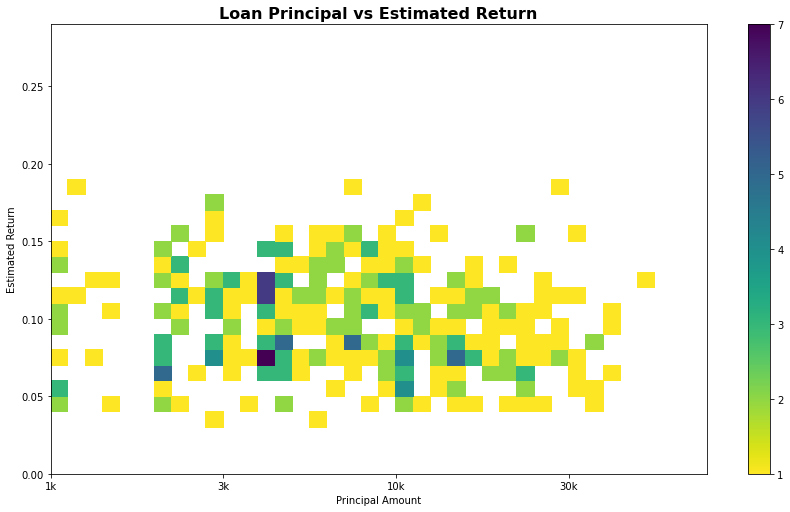

In [10]:
plt.figure(figsize=[14.70, 8.27])
bins_x=np.arange(loan.log_principal.min(), loan.log_principal.max()+0.05, 0.05)
bins_y=np.arange(0, loan.EstimatedReturn.max()+0.01, 0.01)
plt.hist2d(data=df_sample, x='log_principal', y='EstimatedReturn', bins=[bins_x, bins_y], cmin=0.02, cmap='viridis_r')
plt.colorbar()
plt.xticks([3, 3.5, 4, 4.5], ['1k', '3k', '10k', '30k'])
plt.xlabel('Principal Amount')
plt.ylabel('Estimated Return');
plt.title('Loan Principal vs Estimated Return', fontsize=16, weight='bold');

### Estimated Rate of Return vs Prosper Score

We also notice that the distribution of estimated return is lot higher for low prosper score borrowers with the range from -0.26 to 0.28. At the same time, the estimated rate of return is lot more stable and mostly positive for high prosper score borrowers.

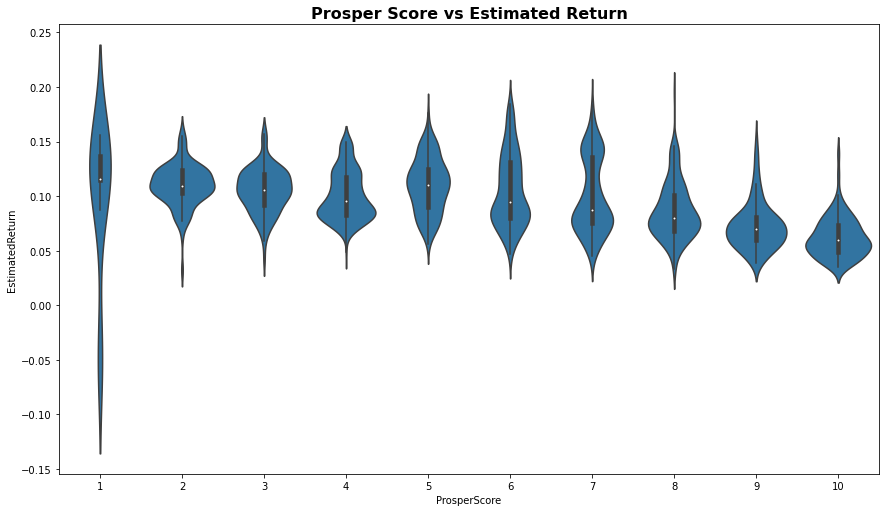

In [11]:
plt.figure(figsize=[14.70, 8.27]);
default_color = sb.color_palette()[0];
sb.violinplot(data=df_sample, x='ProsperScore', y='EstimatedReturn', color=default_color);
plt.title('Prosper Score vs Estimated Return', fontsize=16, weight='bold');

## Loan Outcomes under Different APR and Terms

The dodged pointplots above shows the influence of prosper score and APR on the status of loans. Past due/defaulted/charged off loans happen among various prosper score borrowers, and happen more frequently with the loan term increases.

It also appears that, compared with propser score, the overall effect of loan Term on borrower's APR is smaller. 

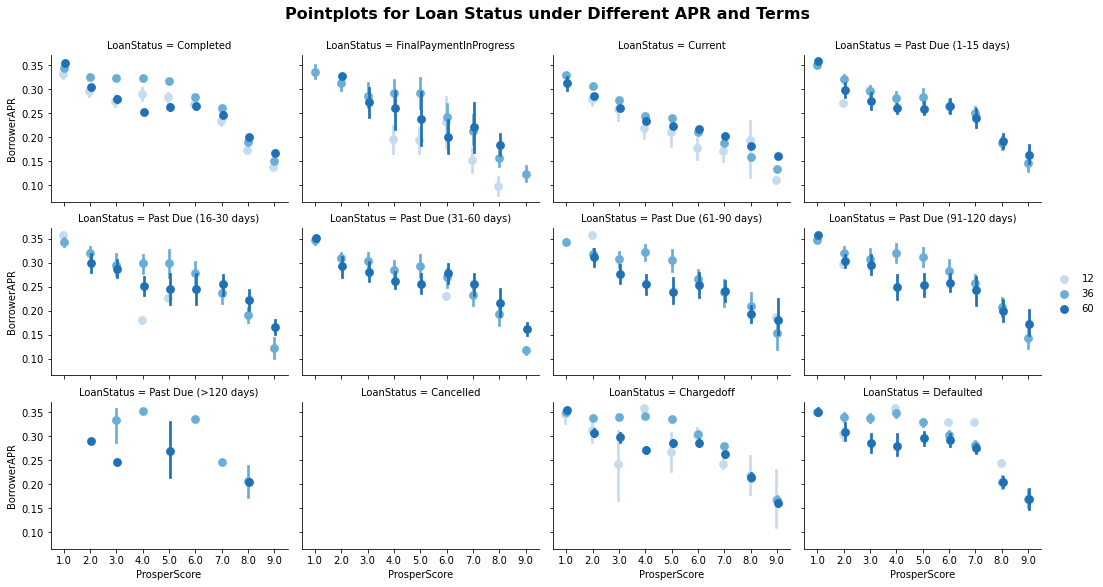

In [12]:
g = sb.FacetGrid(data = loan, col = 'LoanStatus', col_wrap=4,
                height = 8.27/3,  aspect = (14.70/4)/(8.27/3))
g.map(sb.pointplot, 'ProsperScore', 'BorrowerAPR', 'Term',
      linestyles = '', dodge=True, palette='Blues', order = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0])
g.add_legend()
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Pointplots for Loan Status under Different APR and Terms', fontsize=16, weight='bold');
plt.show()

## Factors Impact Loan Size

From the color encoding scatterplot, we notice that there is a roughly positive relationship between monthly income and principal borrowed. Adding the cateogrical vairable "Term", we can see Term 60 associates with more larger size loan, while Term 36 associates with various size of loans. 

In [13]:
#create a sub dataset to exclude the outliers of stated monthly income
loan_sub = df_sample.loc[(df_sample['StatedMonthlyIncome']>1000) & (df_sample['StatedMonthlyIncome']<30000)]
loan_sub['log_monthly_income'] = log_trans(loan_sub['StatedMonthlyIncome'])

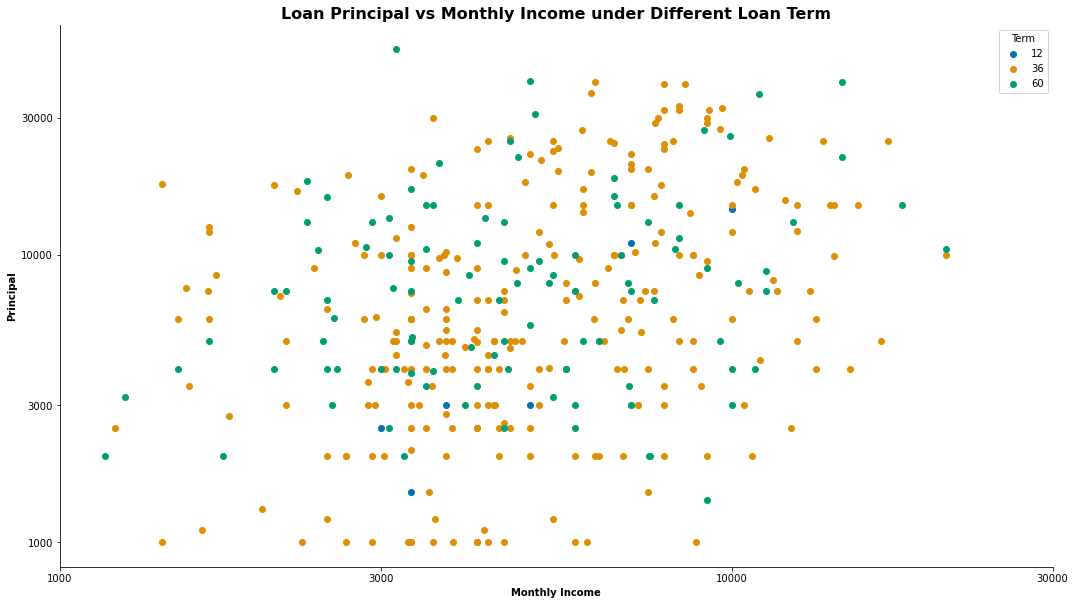

In [14]:
g=sb.FacetGrid(data=loan_sub, hue='Term',
              palette='colorblind', height = 8.27,  aspect = 14.70/8.27)
g.map(plt.scatter, 'log_monthly_income', 'log_principal')
tickmarks=log_trans([1000, 3000, 10000, 30000])
plt.xticks(tickmarks, [1000, 3000, 10000, 30000])
plt.yticks(tickmarks, [1000, 3000, 10000, 30000])
plt.xlabel('Monthly Income', fontsize = 10, weight = "bold")
plt.ylabel('Principal', fontsize = 10, weight = "bold");
plt.legend([12, 36, 60], title='Term');
plt.title('Loan Principal vs Monthly Income under Different Loan Term', fontsize = 16, weight = "bold");

In [ ]:
!jupyter nbconvert slide_deck.ipynb --to slides --post serve  --no-input --no-prompt